In [1]:
'''
Might need to use imbalanced-learn from sklearn, beacause the data is too extream.
pip install dmba
pip install pydotplus
https://github.com/royjafari/DataAnalyticsForFun/blob/main/MLP%20Classification/MLP%20Classify%20-%20E.ipynb

0 and 1 change to yes no for testing
'''

'\nMight need to use imbalanced-learn from sklearn, beacause the data is too extream.\npip install dmba\npip install pydotplus\nhttps://github.com/royjafari/DataAnalyticsForFun/blob/main/MLP%20Classification/MLP%20Classify%20-%20E.ipynb\n\n0 and 1 change to yes no for testing\n'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

#class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

#Reg
from sklearn.svm import LinearSVC
from sklearn.metrics import r2_score, mean_squared_error, precision_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression





no display found. Using non-interactive Agg backend


In [3]:
def evaluateBinaryClassification(predictions, actuals):
    contigency = pd.crosstab(actuals,predictions)
    TP = contigency[1][1]
    TN = contigency[0][0]
    FP = contigency[1][0]
    FN = contigency[0][1]
    n = contigency.sum().sum()

    Acuracy = (TP + TN)/n
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    FScore = 2*Recall*Precision/(Recall+Precision)
    
    return Acuracy, Recall, Precision, FScore

In [4]:
#Create Classifiers
lr = LogisticRegression(solver='lbfgs', max_iter=500)
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)

#Read data
df_agg = pd.read_csv("Sample Data/FS_ALL(No Est).csv") 
#df_agg = pd.read_csv("Sample Data/FS_ALL(No Est).csv", index_col=0) 
df_agg.head()

,"Total debt service (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Real interest rate (%),Total reserves minus gold (in %),Trade (% of GDP),Imports of goods and services (current US$),Exports of goods and services (current US$),Current account balance (% of GDP),"Portfolio investment, net (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",...,Left Government (democ),Polity (polity),Durable (durable),Turnover (xconst),Legislative/Executive election (exrec),State fragility index (sfi),Years (poleff),Economic Effectiveness (ecoeff),Presist (presistance),Target
0,0.0,0.0,0.474178,0.033486,0.505572,0.134906,0.140229,0.511154,0.206589,0.035591,...,1.0,1.0,0.956897,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
1,0.0,0.0,0.382779,0.034902,0.524968,0.165479,0.169241,0.483212,0.206589,0.078971,...,1.0,1.0,0.965517,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
2,0.0,0.0,0.396536,0.036982,0.510508,0.184951,0.191848,0.520425,0.206589,0.113087,...,1.0,1.0,0.974138,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
3,0.0,0.0,0.500240,0.037556,0.518623,0.217342,0.214736,0.401164,0.206589,0.113190,...,1.0,1.0,0.982759,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
4,0.0,0.0,0.626534,0.039688,0.564300,0.256425,0.242148,0.284666,0.206589,0.088505,...,1.0,1.0,0.991379,1.0,1.0,0.166667,0.0,0.0,1.0,0.0


In [5]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Total debt service (% of exports of goods, services and primary income)  195 non-null    float64
 1   Short-term debt (% of total external debt)                               195 non-null    float64
 2   Real interest rate (%)                                                   195 non-null    float64
 3   Total reserves minus gold (in %)                                         195 non-null    float64
 4   Trade (% of GDP)                                                         195 non-null    float64
 5   Imports of goods and services (current US$)                              195 non-null    float64
 6   Exports of goods and services (current US$)                              1

In [6]:
df_agg.shape

(195, 36)

In [7]:
#Set X and y for testing
X = df_agg.drop(columns=['Target','Total debt service (% of exports of goods, services and primary income)','Short-term debt (% of total external debt)'])
y = df_agg['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [8]:
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(136, 33) (59, 33) (136,) (59,)


In [9]:
#Feature Selection
rf = RandomForestClassifier(n_estimators=1000,random_state=2)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

                                              feature  importance       std
20                                          Contagion    0.000000  0.000000
28             Legislative/Executive election (exrec)    0.003061  0.014071
21                                           Soft peg    0.003394  0.017664
27                                  Turnover (xconst)    0.003907  0.016054
31                    Economic Effectiveness (ecoeff)    0.004353  0.023273
30                                     Years (poleff)    0.005088  0.021544
22                                                Peg    0.006428  0.032805
25                                    Polity (polity)    0.007558  0.024049
24                            Left Government (democ)    0.008523  0.028774
32                              Presist (presistance)    0.013113  0.039535
29                        State fragility index (sfi)    0.013922  0.040714
13                                REER 5 Year rolling    0.021172  0.042502
7   Foreign 

/var/folders/sm/z_5cqgtd6ng497yjh3f4gsj80000gp/T/ipykernel_75490/1188547710.py:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [10]:
select_features=df[df.importance>=0.001].feature

In [11]:
#Tuned KNN
knn = KNeighborsClassifier(n_neighbors=1,weights='uniform').fit(X_train[select_features], y_train)
y_predict_knn = knn.predict(X_test[select_features])
pd.crosstab(y_test,y_predict_knn)

col_0,0.0,1.0
Target,,
0.0,48,4
1.0,2,5


In [12]:
evaluateBinaryClassification(y_predict_knn,y_test)

(0.8983050847457628,
 0.7142857142857143,
 0.5555555555555556,
 0.6250000000000001)

In [13]:
#Naive Bayesian

In [14]:
#Set X and y for testing
X = df_agg.drop(columns=['Target'])
y = df_agg['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(136, 35) (59, 35) (136,) (59,)


In [15]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train[select_features], y_train)

y_predict_nb = nb.predict(X_test[select_features])
pd.crosstab(y_test,y_predict_nb)

col_0,0.0,1.0
Target,,
0.0,45,7
1.0,3,4


In [16]:
evaluateBinaryClassification(y_predict_nb,y_test)

(0.8305084745762712,
 0.5714285714285714,
 0.36363636363636365,
 0.4444444444444444)

In [17]:
# predict probabilities
y_prob = nb.predict_proba(X_test[select_features])

summary_df = pd.concat([pd.DataFrame({'actual': y_test, 'predicted': y_predict_nb}),
                pd.DataFrame(y_prob, index=y_test.index,columns = ['No_prob','Yes_prob'])], axis=1)
y_predict_nb = pd.Series(summary_df.Yes_prob>0.9999998888888889).replace({False:0,True:1})

In [18]:
Methods = ['Random','KNN','NB','DT']
Metrics = ['Accuracy','Recall','Precision','Fscore']

compare_df = pd.DataFrame(index = Methods, columns = Metrics)

#Method1 #KNN

compare_df.loc['KNN'] = evaluateBinaryClassification(y_predict_knn,y_test)

number_Yes =  np.sum(y_predict_knn==1)


#Method 2 Random
y_predict_random = pd.Series(np.random.permutation(len(y_test))<number_Yes).replace({False:0,True:1})
print(evaluateBinaryClassification(y_predict_random,y_test))

compare_df.loc['Random'] = evaluateBinaryClassification(y_predict_random,y_test)

'''
#Method 3 NB
compare_df.loc['NB'] = evaluateBinaryClassification(y_predict_nb,y_test)
'''
compare_df

(0.8, 0.0, 0.0, nan)


/var/folders/sm/z_5cqgtd6ng497yjh3f4gsj80000gp/T/ipykernel_75490/2088029018.py:12: RuntimeWarning: invalid value encountered in double_scalars
  FScore = 2*Recall*Precision/(Recall+Precision)
/var/folders/sm/z_5cqgtd6ng497yjh3f4gsj80000gp/T/ipykernel_75490/2088029018.py:12: RuntimeWarning: invalid value encountered in double_scalars
  FScore = 2*Recall*Precision/(Recall+Precision)


,Accuracy,Recall,Precision,Fscore
Random,0.8,0.0,0.0,NaN
KNN,0.898305,0.714286,0.555556,0.625
NB,NaN,NaN,NaN,NaN
DT,NaN,NaN,NaN,NaN


In [19]:
print('Random Method number of yes prediction: {}'.format(np.sum(y_predict_random==1)))
print('KNN Method number of yes prediction: {}'.format(np.sum(y_predict_knn==1)))
print('NB Method number of yes prediction: {}'.format(np.sum(y_predict_nb==1)))

Random Method number of yes prediction: 9
KNN Method number of yes prediction: 9
NB Method number of yes prediction: 0


#DT

In [20]:
#DT Preprocess

In [21]:
#Set X and y for testing
X = df_agg.drop(columns=['Target'])
y = df_agg['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(136, 35) (59, 35) (136,) (59,)


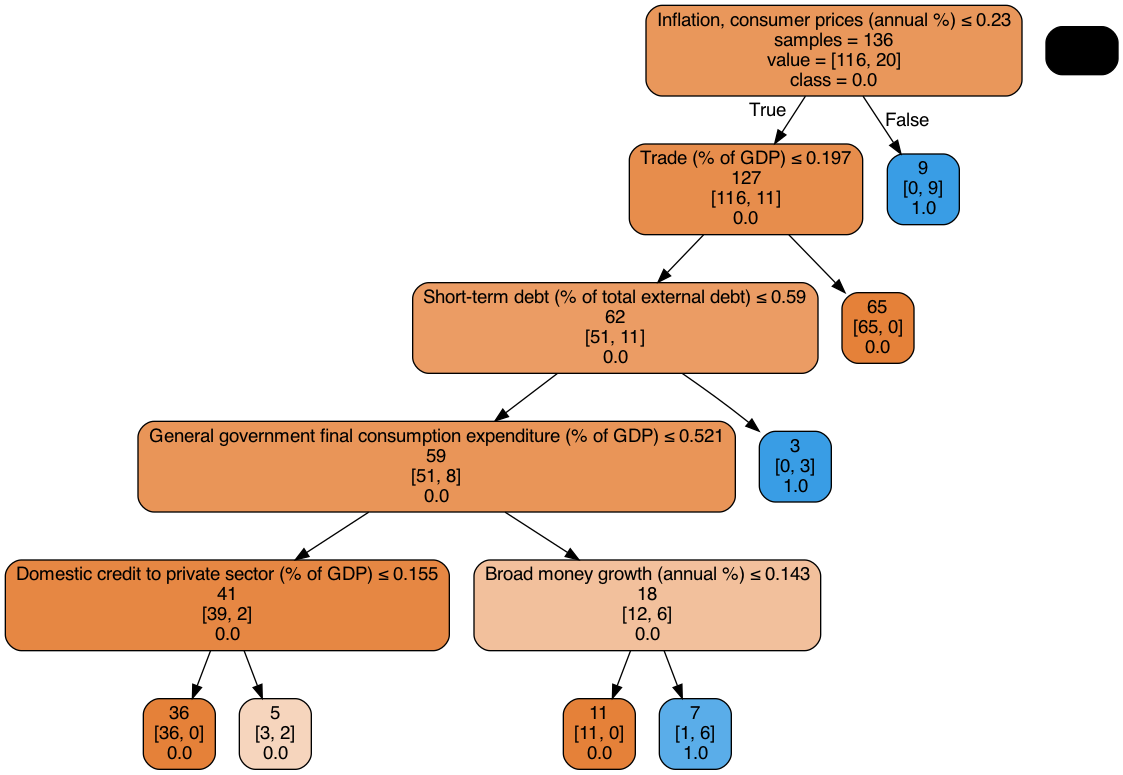

In [22]:
#Tuned DT
classTree = DecisionTreeClassifier(criterion= 'entropy',
                                   min_impurity_decrease= 0.005, min_samples_split= 16, splitter= 'best')
classTree.fit(X_train, y_train)

plotDecisionTree(classTree, feature_names=X_train.columns, class_names=classTree.classes_)

In [23]:
#compare
y_predict_dt = classTree.predict(X_test)
compare_df.loc['DT'] = evaluateBinaryClassification(y_predict_dt,y_test)
compare_df

,Accuracy,Recall,Precision,Fscore
Random,0.8,0.0,0.0,NaN
KNN,0.898305,0.714286,0.555556,0.625
NB,NaN,NaN,NaN,NaN
DT,0.847458,0.571429,0.4,0.470588


In [24]:
#print('Random Method number of yes prediction: {}'.format(np.sum(y_predict_random==1)))
print('KNN Method number of yes prediction: {}'.format(np.sum(y_predict_knn==1)))
print('NB Method number of yes prediction: {}'.format(np.sum(y_predict_nb==1)))
print('DT Method number of yes prediction: {}'.format(np.sum(y_predict_dt==1)))

KNN Method number of yes prediction: 9
NB Method number of yes prediction: 0
DT Method number of yes prediction: 10


In [25]:
#MLP Classificaiton

In [26]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=5)
mlp.fit(X_train, y_train)
y_predict_mlp = mlp.predict(X_test)

/Users/Admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
compare_df.loc['MLP'] = evaluateBinaryClassification(y_predict_mlp,y_test)
compare_df

,Accuracy,Recall,Precision,Fscore
Random,0.8,0.0,0.0,NaN
KNN,0.898305,0.714286,0.555556,0.625
NB,NaN,NaN,NaN,NaN
DT,0.847458,0.571429,0.4,0.470588
MLP,0.915254,0.285714,1.0,0.444444


In [28]:
#print('Random Method number of yes prediction: {}'.format(np.sum(y_predict_random==1)))
print('KNN Method number of yes prediction: {}'.format(np.sum(y_predict_knn==1)))
print('NB Method number of yes prediction: {}'.format(np.sum(y_predict_nb==1)))
print('DT Method number of yes prediction: {}'.format(np.sum(y_predict_dt==1)))
print('MLP Method number of yes prediction: {}'.format(np.sum(y_predict_mlp==1)))

KNN Method number of yes prediction: 9
NB Method number of yes prediction: 0
DT Method number of yes prediction: 10
MLP Method number of yes prediction: 2


In [29]:
#Tune MLP

In [30]:
import warnings

warnings.filterwarnings("ignore")

In [31]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

param_grid = {
    'hidden_layer_sizes':[5],
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam'],
    'learning_rate':['constant','invscaling','adaptive']}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring=['recall','f1'],refit='f1',verbose=2)
gridSearch.fit(X_train, y_train.replace({'yes':1,'no':0}))
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 36 candidates, totalling 36 fits
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=ada

In [32]:
param_grid = {
    'hidden_layer_sizes':[5,10,15,(5,5),(5,10)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate':['invscaling']
}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring='recall',verbose=2)
gridSearch.fit(X_train, y_train.replace({'yes':1,'no':0}))
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=15, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(5, 10), learning_rate=invscaling, solver=adam; total time=   0.1s
Score:  0.4
Parameters:  {'activation': 'relu', 'hidden_layer_sizes': (5, 5), 'learning_rate': 'invscaling', 'solver': 'adam'}


In [33]:
param_grid = {
    'hidden_layer_sizes':[5,10,15,(5,5),(5,10)],
    'activation': ['identity'],
    'solver': ['adam'],
    'alpha': [0,0.0005,0.0001,0.0005,0.001],
    'learning_rate':['invscaling'],
    'learning_rate_init': [0,0.0001,0.0005,0.001, 0.005,0.01],
    'max_iter': [200,500],
    'shuffle': [True,False] 
}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring='recall',verbose=2)
gridSearch.fit(X_train, y_train.replace({'yes':1,'no':0}))
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 600 candidates, totalling 600 fits
[CV] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=invscaling, learning_rate_init=0, max_iter=200, shuffle=True, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=invscaling, learning_rate_init=0, max_iter=200, shuffle=False, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=invscaling, learning_rate_init=0, max_iter=500, shuffle=True, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=invscaling, learning_rate_init=0, max_iter=500, shuffle=False, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=invscaling, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=invscaling

In [34]:
X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train,
                                                        test_size=0.2)
for i in range(15):
    mlp = MLPClassifier(hidden_layer_sizes=5,activation='relu',
                        learning_rate='invscaling', solver='adam',
                        random_state=i)
    
    mlp.fit(X_train_s, y_train_s)
    y_predict_mlp = mlp.predict(X_tune)
    #print(i,evaluateBinaryClassification(y_predict_mlp,y_tune))            

In [35]:
print(y_test)

132    1.0
16     0.0
18     0.0
51     0.0
164    0.0
145    0.0
11     0.0
27     0.0
176    0.0
118    0.0
28     0.0
170    1.0
56     0.0
116    0.0
103    0.0
31     0.0
59     1.0
40     1.0
136    0.0
95     0.0
35     0.0
107    0.0
69     1.0
84     0.0
130    1.0
99     0.0
123    0.0
29     0.0
4      0.0
167    0.0
82     0.0
188    0.0
67     0.0
190    0.0
81     0.0
112    0.0
44     0.0
181    0.0
187    0.0
53     0.0
14     0.0
119    0.0
19     0.0
47     0.0
39     0.0
94     0.0
117    0.0
90     0.0
66     0.0
58     1.0
33     0.0
175    0.0
153    0.0
189    0.0
194    0.0
185    0.0
193    0.0
168    0.0
73     0.0
Name: Target, dtype: float64


In [36]:
mlp = MLPClassifier(hidden_layer_sizes=5,activation='relu',
                        learning_rate='invscaling', solver='adam',
                        random_state=13)

mlp.fit(X_train_s, y_train_s)
y_predict_mlp = mlp.predict(X_test)
compare_df.loc['MLP'] = evaluateBinaryClassification(y_predict_mlp,y_test)
compare_df

KeyError: 1

In [ ]:
#print('Random Method number of yes prediction: {}'.format(np.sum(y_predict_random==1)))
print('KNN Method number of yes prediction: {}'.format(np.sum(y_predict_knn==1)))
print('NB Method number of yes prediction: {}'.format(np.sum(y_predict_nb==1)))
print('DT Method number of yes prediction: {}'.format(np.sum(y_predict_dt==1)))
print('MLP Method number of yes prediction: {}'.format(np.sum(y_predict_mlp==1)))

In [ ]:
from sklearn.model_selection import GridSearchCV


parameter_space = {
    "random_state": [4211],
    "max_iter": [500],
    "early_stopping": [True],
    "hidden_layer_sizes": [(32, 32, 32), (64, 64, 64)],
    "learning_rate_init": [0.1, 0.01, 0.001],
    "learning_rate": ["adaptive"],
    "solver": ['sgd', 'adam'],
}

x_train, y_train = X_train[lasso_selected].values, df_train['label'] 

# 5-fold cross validation with metric accuracy
grid_search = GridSearchCV(MLPClassifier(), parameter_space, cv=5, scoring="accuracy")
grid_search.fit(x_train, y_train)


params = grid_search.cv_results_['params']
mean_accuracies = grid_search.cv_results_['mean_test_score']
std_accuaracies = grid_search.cv_results_['std_test_score']


top_k = 3
sorted_idx = np.argsort(mean_accuracies)[::-1][:top_k]

for i in sorted_idx:
    print(params[i])
    print(f"validation acc: {mean_accuracies[i]} +/- {std_accuaracies[i]}")


print(grid_search.best_params_)

x_train, y_train = X_train[lasso_selected].values, df_train['label']
x_test, y_test = X_test[lasso_selected].values, df_test['label']

model = MLPClassifier(**grid_search.best_params_)
model.fit(x_train, y_train)

# predictions on the test set
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)